In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv('advertising.csv')

#这一步是对数据进行处理，直接使用pandas内置的函数，就是（数据-最小值）/（最大值-最小值）

df_norm = (data - data.min()) / (data.max() - data.min())
numpy_array=df_norm.values#记得是values，千万不要少打s

In [3]:
wechat=numpy_array[:,0]
weibo=numpy_array[:,1]
others=numpy_array[:,2]

In [4]:
#h=numpy_array[:,3]
#wechat=numpy_array[:,0]
#weibo=numpy_array[:,1]
#others=numpy_array[:,2]
#x=[1,wechat,weibo,others]
#h

In [5]:
#k=0
#b=0
#y=0
#def model(k,b,x):
    #y=k*x+b
    #return y

# 上面写了是单变量线性回归的代码，但是多变量怎么办呢？
y=k1*x1+k2*x2+k3*x3+b  
就这样

In [6]:
#k1=0
#k2=0
#k3=0
#data_2=[k1,k2,k3]
#def model(k1,k2,k3,b,x1,x2,x3):
    #y=k1*x1+k2*x2+k3*x3+b
    #return y

# 这样实现了代码，但是很慢，怎么办？
改并行计算！
# 怎么改？
用numpy库的dot函数！

In [7]:
#k1=1
#k2=1
#k3=1
#k0=1
#b=1
#y=1
#data_2=[k0,k1,k2,k3]
#cita=np.array(data_2)
#def model(cita,x):
    #y=np.dot(cita,x)
    #return y

In [8]:
#def cost(h,y):
    #return 0.5*1/97*np.sum((y-h)**2)

# 上面的是线性回归的损失函数，多变量依然沿用，也是类似的方式

In [9]:
#def cost(h,y):
    #return 0.5*1/200*np.sum((y-h)**2)

# 好了，下面就是最关键的梯度下降，仍然还是老规矩，先贴单变量的代码

In [10]:
#定义梯度下降的函数，使用批量梯度下降，学习率是我室友随口说的一个数  
#alpha=0.02
#def down(y,h,x):
    #global k,b
    #change_k=k-alpha*1/97*np.sum((y-h)*x)
    #change_b=b-alpha*1/97*np.sum((y-h))
    #k=change_k
    #b=change_b
    #return k,b

# so, 以此类推，我们需要分别对k1,k2和k3与b求偏导，然后进行更新

In [11]:
#alpha=0.002
#def down(wechat,weibo,others,k1,k2,k3):
    #global y,b
    #change_k1=k1-alpha*1/200*np.sum((y-h)*wechat)
    #change_k2=k2-alpha*1/200*np.sum((y-h)*weibo)
    #change_k3=k3-alpha*1/200*np.sum((y-h)*others)
    #change_b=k1-alpha*1/200*np.sum((y-h))
    #k1=change_k1
    #k2=change_k2
    #k3=change_k3
    #b=change_b
    #return k1,k2,k3,b

# 这段代码没用并行计算，主要是确实又懒又菜
## 有如下的优化方向：
1 采用并行（这个好像不太好实现吧）

2 把批量梯度下降改成随机梯度下降（mini-banch）

在此留下一点优化的空间吧

~~绝对不是因为我不会，就算是我也不可能告诉你们的，哼~~

In [12]:
#for i in range(100000):
    #y=model(cita,x,b)
    #down(wechat,weibo,others,k1,k2,k3)
#print(k1,k2,k3,b)

我宣布上面写的都是屎

# 11.22日更
昨天晚上实在是太晚了，人也有点累，所以没有更新这个，回来执行完跟幼儿简笔涂鸦一样，~~画的还没我小时候好看呢~~

所以优化是迫在眉睫的事情



## 如何优化？
回去又看了看吴恩达的机器学习，里面提到一个重要的概念

### 向量化
这玩意非常重要，可以提高计算速度和精度

回到我们最初的式子
y=kx+b

在这里我们可以把b看作k2*x2,但是x2==1

于是我们可以这样处理数据

创建一个numpy数组，然后把数据集的左边加上一列1，之后把b设成k0

In [13]:
x0=np.ones((200,1))
h=numpy_array[:,-1:]#最后一个冒号为了保持列向量
x=numpy_array[:,:-1]#提取出x1,x2和x3
weibo=numpy_array[:,0]
weixin=numpy_array[:,1]
others=numpy_array[:,2]
x_full=np.hstack((x0,x))
x_full#这玩意就是x的向量
k0=1
k1=1
k2=1
k3=1
k_full=np.array([k0,k1,k2,k3])
np.shape(h)

(200, 1)

# 在上面的这段代码，我完成了把k,x,b都向量化，这样可以并行计算
下面还是构建模型和损失函数

In [14]:
def model(x_full,k_full):
    y=np.dot(x_full,k_full)
    return y
y=model(x_full,k_full)
np.shape(y)

(200,)

In [15]:
def cost(y,h):
    return 0.5*1/200*np.sum((y-h)**2)

# 还是最重要的梯度下降

In [16]:
alpha=0.002

def down(k0, k1, k2, k3, y, x_full, alpha):
    # 假设 x_full 是形状为 (n_samples, 3) 的数组
    h = k0 + k1 * x_full[:, 0] + k2 * x_full[:, 1] + k3 * x_full[:, 2]
    errors = y - h
    
    # 计算每个参数的梯度
    grad_k0 = -np.sum(errors * x_full[:, 0]) / len(y)
    grad_k1 = -np.sum(errors * x_full[:, 1]) / len(y)
    grad_k2 = -np.sum(errors * x_full[:, 2]) / len(y)
    grad_k3 = -np.sum(errors * x_full[:, 3]) / len(y)
    
    # 更新参数
    k0 -= alpha * grad_k0
    k1 -= alpha * grad_k1
    k2 -= alpha * grad_k2
    k3 -= alpha * grad_k3
    
    return k0, k1, k2, k3

# 好吧，最终也确实还没有完全向量化
~~纯菜狗~~

In [19]:
for i in range(10000):
    y=model(x_full,k_full)
    k0,k1,k2,k3=down(k0, k1, k2, k3, y, x_full, alpha)
print(k0,k1,k2,k3)

0.20163965174355478 1.0194666442402047 0.5982846756803208 1.5567057052971798


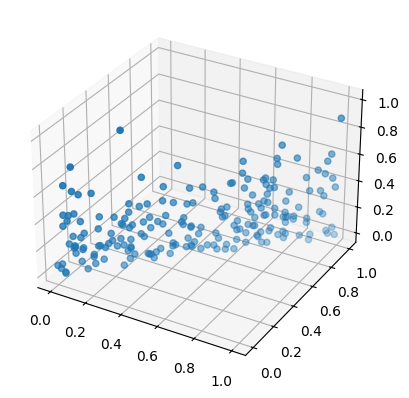

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(wechat, weibo,others )